In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir("C:\\code\\activ")

In [3]:
df_name = 'nov_nine_var.xlsx'

In [4]:
df = pd.read_excel('./documents/'+df_name)

In [5]:
df.isnull().any()

Unnamed: 0       False
합계출산율            False
국내 총인구           False
서울인구             False
경기도인구            False
인천시인구            False
수도권 인구           False
신생아 출산인구         False
사망인구             False
혼인건수             False
이혼건수             False
소비자물가            False
- 농축수산물          False
- 공업제품           False
- 집세             False
- 공공서비스          False
- 개인서비스          False
소비자 물가 지수        False
금리               False
원 달러 환율          False
국제유가(WTI, 달러)    False
국내총생산            False
수도권 과밀화율         False
dtype: bool

In [5]:
X = df.iloc[:,1:22]
X_ = X
y = df.iloc[:,22:23].to_numpy()

In [6]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [8]:
X = X.astype(np.float16)
y = y.astype(np.float16)

In [9]:
X.shape

(431, 21)

In [10]:
y.shape

(431, 1)

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_dim=21, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2816      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________


In [13]:
hist = model.fit(X_train, y_train, epochs=1000, batch_size=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/1000
4/4 [==============================] - 1s 63ms/step - loss: 0.0012 - val_loss: 4.8302e-04
Epoch 2/1000
4/4 [==============================] - 0s 14ms/step - loss: 3.0349e-04 - val_loss: 3.1310e-04
Epoch 3/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.5755e-04 - val_loss: 2.8203e-04
Epoch 4/1000
4/4 [==============================] - 0s 11ms/step - loss: 2.0483e-04 - val_loss: 1.9723e-04
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.7235e-04 - val_loss: 1.6133e-04
Epoch 6/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.4196e-04 - val_loss: 1.1837e-04
Epoch 7/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0340e-04 - val_loss: 9.0553e-05
Epoch 8/1000
4/4 [==============================] - 0s 12ms/step - loss: 7.7073e-05 - val_loss: 6.3123e-05
Epoch 9/1000
4/4 [==============================] - 0s 11ms/step - loss: 5.6695e-05 - val_loss: 4.6488e-05
Epoch 10/1000
4/4 [======================

In [14]:
pred = model.predict(X)

model.save('./model/dnn.h5')
np.save('./documents/result/dnn_pred.npy', pred)

14/14 [==============================] - 0s 1ms/step


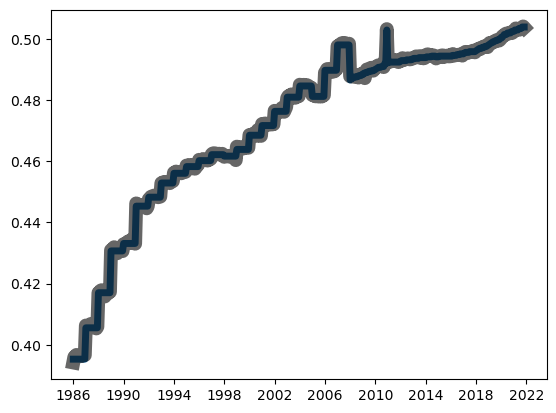

In [20]:
plt.plot(y, linewidth=5, zorder=0, label='real_data')
plt.scatter([i for i in range(len(pred))], pred, s=3, c='k', alpha=0.6, zorder=1, label='prediction')

plt.grid(False)
plt.xticks([0, 48, 96, 144, 192, 240, 288, 336, 384, 432], labels=[1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018, 2022])
plt.savefig('./documents/fig/dnn_fig.jpg')

plt.show()

In [16]:
error = abs(y - pred)
error_sum = 0

for j in range(395):
    error_sum = error_sum + error[j]

In [17]:
error_sum / 395

array([0.00038845], dtype=float32)

permultation

In [18]:
train = pd.DataFrame(X_train)
train.columns = df.iloc[:,1:22].columns

In [19]:
train.columns = ['Metropolitan area population', 'Population of Incheon city', 'Population of Gyeonggi-do', 'Gross domestic population', 'Consumer price index', 'Gross domestic product', 'Number of divorces', 'International oil price', 'Won-dollar exchange rate', 'Death population' , 'Seoul Population', 'Number of Marriages', 'Agricultural Products', 'Industrial Products', 'Consumer Price', 'Public Service', 'Rent', 'Personal Service', 'Newborn Population', 'Interest Rate' , 'Total fertility rate']

In [20]:
from sklearn.inspection import permutation_importance # sklearn 22 버전부터 해당
from sklearn.metrics import make_scorer

# MAPE
def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# fix_model : 훈련된 모델
# X_train : 훈련데이터 Feature
# y_train : 훈련데이터 Target
# scoring : Feature 를 Shuffler 한 뒤, 예측값과 실제값을 어떤 Metric 을 사용해 비교할지
# n_repeats : 특정 Feature 를 몇번 Shuffle 할 것인지
# random_state : 난수 고정
result = permutation_importance(model, X_train, y_train, scoring = make_scorer(mean_absolute_percentage_error,greater_is_better=False),
                            n_repeats=3,
                            random_state=0)
# Feature label
Feature = train

# Feature 중요도를 오름차순으로 정렬한 뒤, 해당 Feature 의 index 를 저장
sorted_result = result.importances_mean.argsort()

# 결과를 DataFrame 화
importances = pd.DataFrame(result.importances_mean[sorted_result], index=Feature.columns[sorted_result]).sort_values(0, ascending=False)   
importances

11/11 [==============================] - 0s 1ms/step


,0
Gross domestic population,2.491793
Gross domestic product,1.576554
Total fertility rate,1.547413
Rent,0.922849
Population of Incheon city,0.886671
Population of Gyeonggi-do,0.822110
Metropolitan area population,0.753852
Consumer price index,0.528339
Personal Service,0.501770
Seoul Population,0.373991


In [21]:
importances.to_csv('./documents/result/importances.csv')

In [24]:
import seaborn as sns

In [22]:
importance = importances[0]
importance = importance.to_numpy().reshape(-1, 1)

importance_scaler = MinMaxScaler()
scaled_value = importance_scaler.fit_transform(importance)

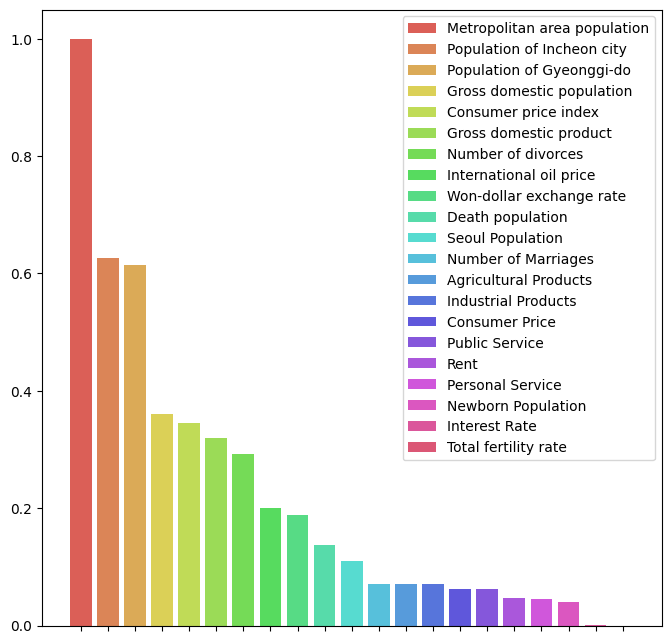

In [25]:
bar_name = ['Metropolitan area population', 'Population of Incheon city', 'Population of Gyeonggi-do', 'Gross domestic population', 'Consumer price index', 'Gross domestic product', 'Number of divorces', 'International oil price', 'Won-dollar exchange rate', 'Death population' , 'Seoul Population', 'Number of Marriages', 'Agricultural Products', 'Industrial Products', 'Consumer Price', 'Public Service', 'Rent', 'Personal Service', 'Newborn Population', 'Interest Rate' , 'Total fertility rate']
bar_value = scaled_value.T[0]
## 바 차트 그리기
colors = sns.color_palette('hls', 21)
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 프레임(그림 뼈대) 생성
 
## 바 차트 생성
bars = ax.bar(bar_name, bar_value, color=colors) ## 막대기 요소 저장
 
ax.legend(handles=bars,labels=bar_name)
ax.tick_params(labelbottom=False)
 
plt.savefig('./documents/fig/importances.jpg')
plt.show()

In [26]:
df_scaler = MinMaxScaler()
cov_mat_var = scaler.fit_transform(df.iloc[:,1::].to_numpy())

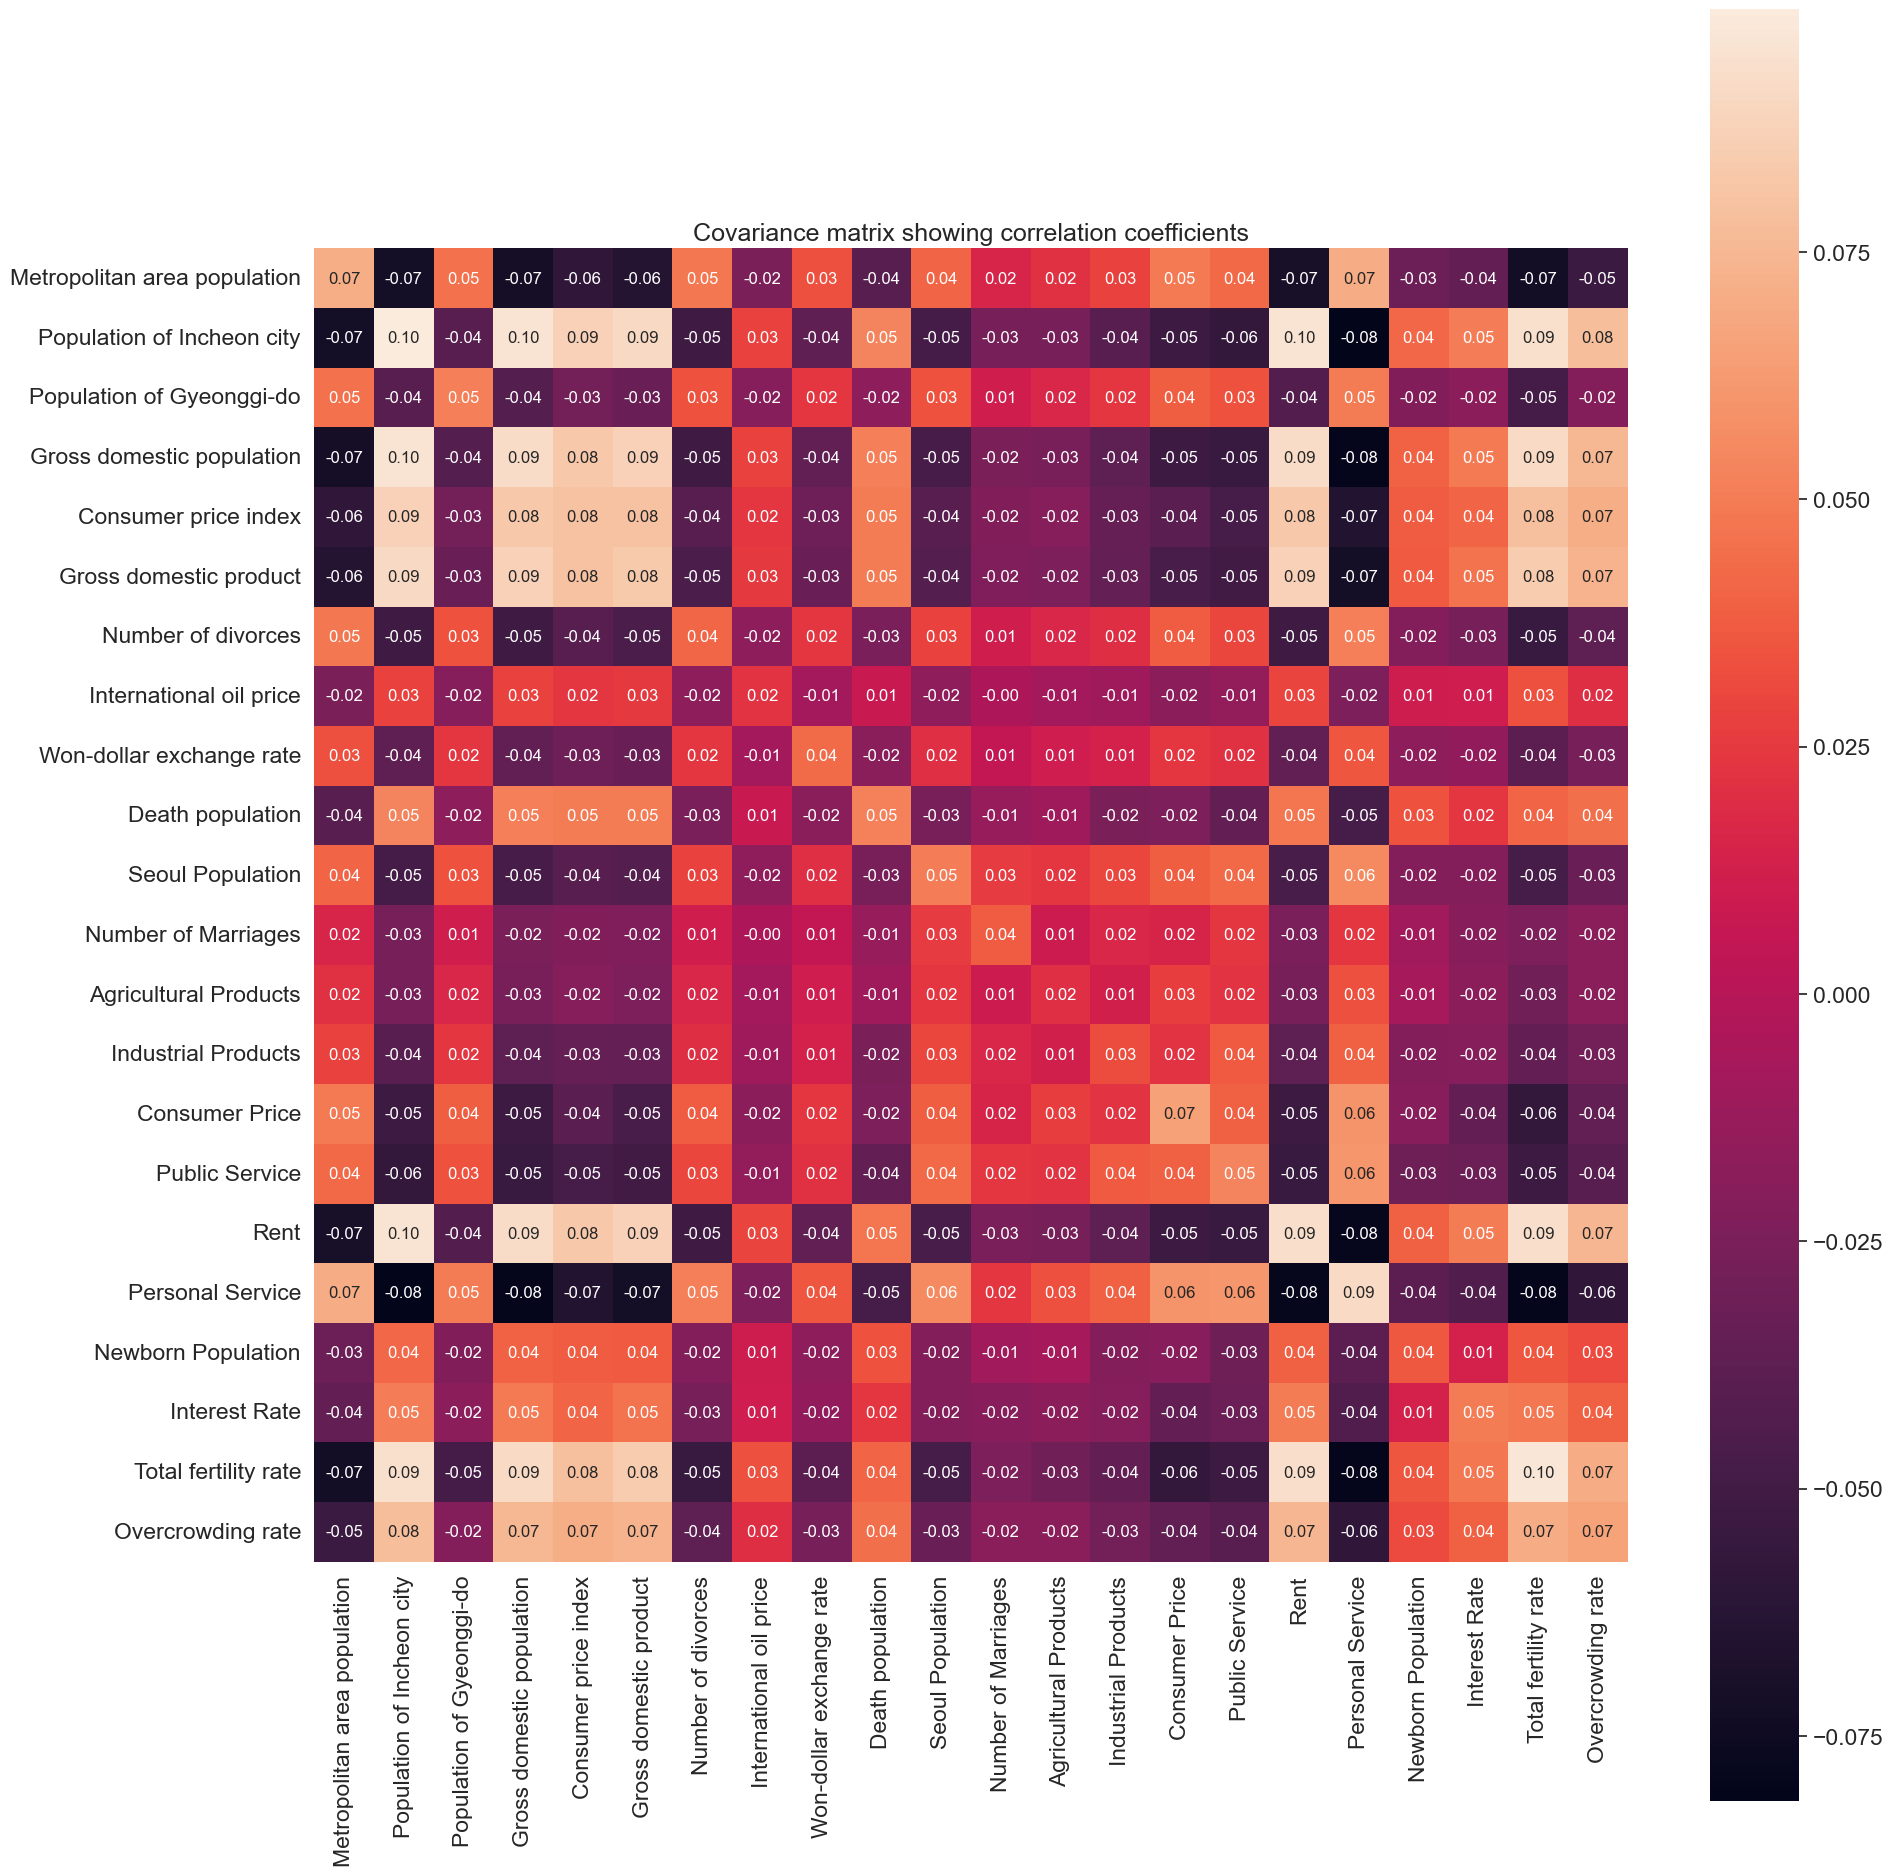

In [27]:
cov_mat = np.cov(cov_mat_var.T)
cols = ['Metropolitan area population', 'Population of Incheon city', 'Population of Gyeonggi-do', 'Gross domestic population', 'Consumer price index', 'Gross domestic product', 'Number of divorces', 'International oil price', 'Won-dollar exchange rate', 'Death population' , 'Seoul Population', 'Number of Marriages', 'Agricultural Products', 'Industrial Products', 'Consumer Price', 'Public Service', 'Rent', 'Personal Service', 'Newborn Population', 'Interest Rate' , 'Total fertility rate', 'Overcrowding rate']
plt.rcParams['font.family'] = 'Gulim'
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.savefig('./documents/fig/heatmap.jpg')
plt.show()